**GOOGLE STOCK PRICE PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

training_set=pd.read_csv('/content/GOOG_Train.csv',parse_dates=['Date'])


In [ ]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,2020-02-01,67.077499,68.406998,67.077499,68.368500,28132000
1,2020-03-01,67.392998,68.625000,67.277199,68.032997,23728000
2,2020-06-01,67.500000,69.824997,67.500000,69.710503,34646000
3,2020-07-01,69.897003,70.149498,69.518997,69.667000,30054000
4,2020-08-01,69.603996,70.579002,69.542000,70.216003,30560000


In [ ]:
training_set.tail()

,Date,Open,High,Low,Close,Volume
959,2023-10-24,139.160004,140.710007,138.750000,140.119995,26535200
960,2023-10-25,129.770004,130.100006,126.089996,126.669998,58796100
961,2023-10-26,124.470001,125.459999,122.320000,123.440002,33907400
962,2023-10-27,124.029999,124.440002,121.459999,123.400002,37367700
963,2023-10-30,124.459999,126.550003,123.879997,125.750000,24165600


In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    964 non-null    datetime64[ns]
 1   Open    964 non-null    float64       
 2   High    964 non-null    float64       
 3   Low     964 non-null    float64       
 4   Close   964 non-null    float64       
 5   Volume  964 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 45.3 KB


In [ ]:
training_set.describe()

,Open,High,Low,Close,Volume
count,964.000000,964.000000,964.000000,964.000000,9.640000e+02
mean,107.275250,108.583399,106.101148,107.359326,2.967813e+07
std,25.381273,25.486895,25.193032,25.318872,1.296839e+07
min,52.825500,53.566002,50.676800,52.831001,6.936000e+06
25%,87.665751,88.667625,86.955000,87.877500,2.115750e+07
50%,107.580753,109.184250,106.300747,108.200001,2.644245e+07
75%,129.988751,131.401245,128.416398,129.667881,3.391550e+07
max,151.863495,152.100006,149.887497,150.709000,9.779860e+07


In [ ]:
training_set.shape

(964, 6)

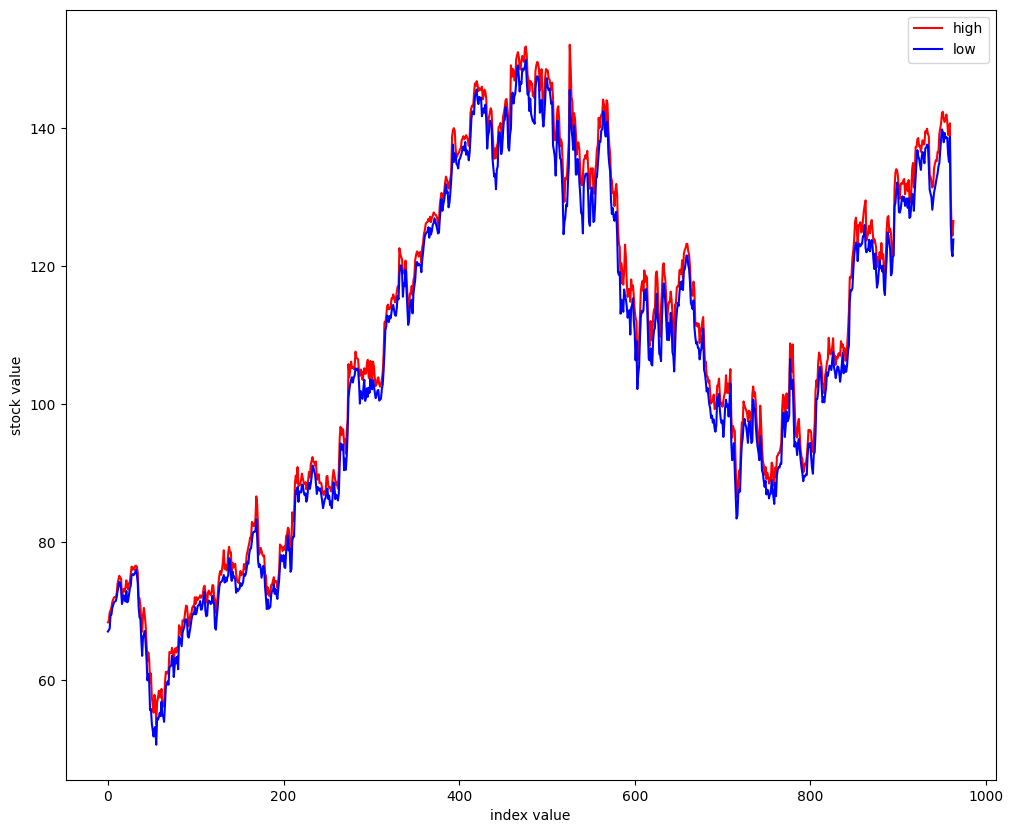

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(training_set['High'],color='red',label='high')
plt.plot(training_set['Low'],color='blue',label='low')
plt.xlabel('index value')
plt.ylabel('stock value')
plt.legend()
plt.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=training_set['Date'],
                open=training_set['Open'],
                high=training_set['High'],
                low=training_set['Low'],
                close=training_set['Close'])])

fig.update_layout(
    margin=dict(l=30, r=30, t=30, b=30),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
training_set=training_set.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler #ppt
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

X_train= training_set[0:964]
y_train= training_set[0:964]

X_train=np.reshape(X_train, (964 , 1 , 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

regressor.add(Dense( units=1 ))

regressor.compile(optimizer='adam', loss='mean_squared_error')
m=regressor.fit(X_train, y_train, batch_size=32, epochs=300)

Epoch 1/300
31/31 [==============================] - 2s 3ms/step - loss: 0.4817
Epoch 2/300
31/31 [==============================] - 0s 3ms/step - loss: 0.3882
Epoch 3/300
31/31 [==============================] - 0s 3ms/step - loss: 0.3106
Epoch 4/300
31/31 [==============================] - 0s 3ms/step - loss: 0.2473
Epoch 5/300
31/31 [==============================] - 0s 3ms/step - loss: 0.1960
Epoch 6/300
31/31 [==============================] - 0s 3ms/step - loss: 0.1559
Epoch 7/300
31/31 [==============================] - 0s 3ms/step - loss: 0.1244
Epoch 8/300
31/31 [==============================] - 0s 3ms/step - loss: 0.1009
Epoch 9/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0837
Epoch 10/300
31/31 [==============================] - 0s 2ms/step - loss: 0.0715
Epoch 11/300
31/31 [==============================] - 0s 3ms/step - loss: 0.0633
Epoch 12/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0577
Epoch 13/300
31/31 [=================

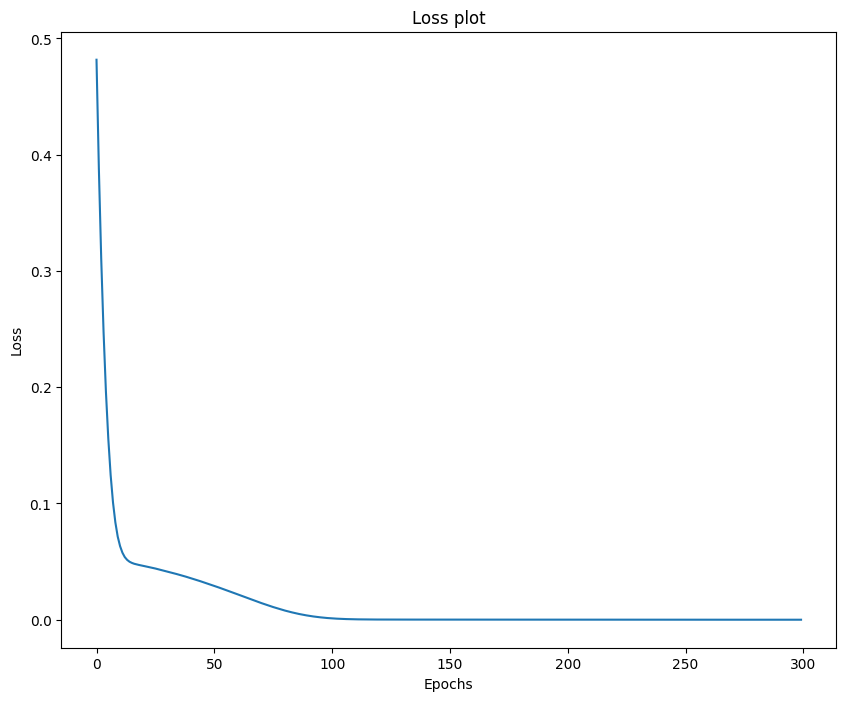

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(m.history['loss'])
plt.title('Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
test_set = pd.read_csv('/content/GOOG_Test.csv',parse_dates=['Date'])


In [ ]:
test_set.head()

,Date,Open,High,Low,Close,Volume
0,2023-03-11,129.089996,130.729996,129.009995,130.369995,19517900
1,2023-06-11,130.220001,131.559998,129.929993,131.449997,15360400
2,2023-07-11,131.979996,133.279999,131.139999,132.399994,19223800
3,2023-08-11,132.360001,133.539993,132.160004,133.259995,15093600
4,2023-09-11,133.360001,133.960007,131.509995,131.690002,17976500


In [ ]:
test_set.tail()

,Date,Open,High,Low,Close,Volume
15,2023-11-27,137.570007,139.630005,137.539993,138.050003,17886400
16,2023-11-28,137.630005,138.660004,137.039993,138.619995,17046900
17,2023-11-29,138.985001,139.669998,136.294998,136.399994,21014700
18,2023-11-30,136.399994,136.960007,132.789993,133.919998,29913500
19,2023-01-12,133.320007,133.500000,132.151993,133.320007,24258400


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Open    20 non-null     float64       
 2   High    20 non-null     float64       
 3   Low     20 non-null     float64       
 4   Close   20 non-null     float64       
 5   Volume  20 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.1 KB


In [ ]:
test_set.shape

(20, 6)

In [ ]:
test_set.describe()

,Open,High,Low,Close,Volume
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,135.247751,136.449851,134.243098,135.470499,1.896330e+07
std,3.124309,3.054322,2.935817,2.885419,4.415367e+06
min,129.089996,130.729996,129.009995,130.369995,8.828600e+06
25%,133.080005,133.855004,131.991493,133.305004,1.688765e+07
50%,136.024994,137.100006,135.215004,135.904999,1.793145e+07
75%,137.677505,138.901253,136.481247,138.092502,2.090835e+07
max,139.539993,141.100006,139.000000,140.020004,2.991350e+07


In [ ]:
fig = go.Figure(data=[go.Candlestick(x=test_set['Date'],
                open=test_set['Open'],
                high=test_set['High'],
                low=test_set['Low'],
                close=test_set['Close'])])
fig.show()

In [ ]:
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20 , 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 300ms/step


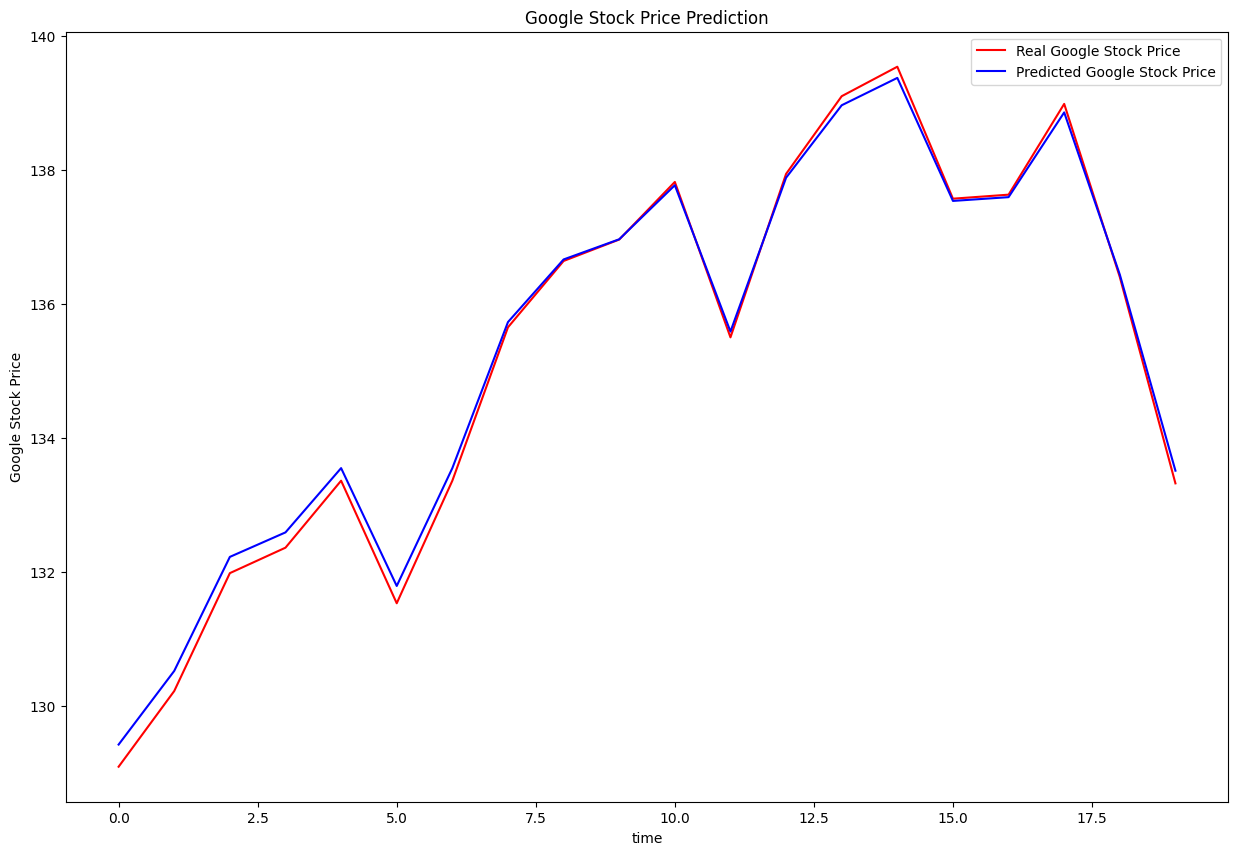

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(real_stock_price, color = 'red' , label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()